<h2> Requirements and Installs </h2>

In [1]:
#run the installs only once when you start the notebook

In [2]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.2 MB/s eta 0:15:56tcmalloc: large alloc 1147494400 bytes == 0x3a220000 @  0x7fc1aea0d615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:13:20tcmalloc: large alloc 1434370048 bytes == 0x7e876000 @  0x7fc1aea0d615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |

In [3]:
from google.colab import drive #this connects google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
import os
import random
import glob
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
#Please change directory to where the pretrained model weights are

In [8]:
directorypath='/content/gdrive/MyDrive/yolo_wastenet_weights'

In [9]:
os.chdir(directorypath)

In [10]:
pwd

'/content/gdrive/MyDrive/yolo_wastenet_weights'

In [11]:
#load the model (torch.hub.load) and the weights (path)

In [12]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='last_s_e17.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: torch>=1.7.0 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: torchvision>=0.8.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: ipython not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 3 packages updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-8-31 Python-3.7.13 torch-1.8.1+cu111 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

Fusing layers... 
Model summary: 213 layers, 70

In [13]:
# get a list of image urls that you need to use

In [57]:
images=glob.glob("/content/gdrive/MyDrive/data/test_images/test_images/*")
#images=glob.glob("/content/gdrive/MyDrive/data/test_images/google_images/*")

In [45]:
print(images)

['/content/gdrive/MyDrive/data/test_images/google_images/220px-Bottle_of_milk.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/images5.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/images6.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/images8.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/images9.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/images10.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/images13.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/DSC_0304.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/empty-bottle-trash-botte-dirty-water-69903636.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/images22.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/Coke1.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/18846183_303.jpeg', '/content/gdrive/MyDrive/data/test_images/google_images/coca-cola-beach-cut.jpeg', '/cont

In [16]:
#check model configuration 
#this is the threshold of detections, loweing it will give you more detections but at lower probability

In [17]:
#Find out model results

In [73]:
model.conf #default
model.conf=.15

0.2

In [74]:
results = model(images[0])

In [75]:
results

In [76]:
out_results=model(np.squeeze(results.render()))

In [77]:
pred_list= out_results.names

In [78]:
#Get CLass Names

In [79]:
pred_list

{0: 'AluCan', 1: 'Glass', 2: 'HDPEM', 3: 'PET'}

**<h2> Get the model predictions</h2>**

In [80]:
no_detections=[]
confidence=[]
label=[]
image_info=[]

In [81]:
for image in images:
    out_results=model(image)
    predictions=out_results.pred
    out_results.pred[0]
    for pred in range(len(out_results.pred[0])):
        con=out_results.pred[0][pred][-2]
        confidence.append(float(con))
        p=out_results.pred[0][pred][-1]
        p = int(p)
        label.append(pred_list[p])
        no_detections.append(len(out_results.pred[0]))
        image_info.append(image)
        
    if len(out_results.pred[0])==0:
        image_info.append(image)
        confidence.append(0)
        no_detections.append(len(out_results.pred[0]))
        label.append("None")

tensor([[263.89511, 226.87839, 431.54593, 503.75778,   0.96431,   2.00000]], device='cuda:0')

tensor([[131.58061, 151.31133, 313.03140, 461.84067,   0.92895,   2.00000]], device='cuda:0')

tensor([[142.08525, 247.20683, 279.18576, 468.15619,   0.96479,   2.00000]], device='cuda:0')

tensor([[181.27249, 279.85400, 334.86404, 520.53961,   0.96151,   2.00000]], device='cuda:0')

tensor([[171.52283, 210.56595, 305.76971, 438.74490,   0.96756,   2.00000]], device='cuda:0')

tensor([[109.09036, 305.45746, 294.82520, 620.25513,   0.92693,   2.00000]], device='cuda:0')

tensor([[231.86725,  37.74400, 381.10120, 215.99098,   0.95916,   3.00000],
        [313.13321, 478.94617, 490.56830, 681.46735,   0.94414,   2.00000],
        [ 89.21293, 415.42249, 212.93297, 519.31024,   0.93233,   0.00000],
        [294.60590, 324.12363, 403.39136, 425.34171,   0.91856,   0.00000],
        [  0.00000, 194.21230, 167.15472, 314.44199,   0.91554,   0.00000]], device='cuda:0')

tensor([[273.13156, 412.99054, 480.74548, 648.65875,   0.95466,   2.00000],
        [169.57735,  74.37325, 292.23361, 198.04089,   0.92746,   0.00000],
        [ 21.47425, 350.30539, 161.22699, 465.52072,   0.92478,   0.00000],
        [  0.00000,  93.76972,  94.09537, 239.22650,   0.88644,   0.00000],
        [428.84344, 192.25372, 512.00000, 297.45547,   0.84572,   3.00000]], device='cuda:0')

tensor([[226.68620, 311.93890, 398.60004, 540.32666,   0.88560,   0.00000],
        [190.07732,  69.59592, 353.71286, 235.31244,   0.86885,   0.00000]], device='cuda:0')

tensor([[179.63661,  89.49191, 420.86481, 188.29970,   0.92577,   1.00000],
        [  0.00000, 317.59802,  92.72219, 437.80161,   0.90883,   0.00000],
        [180.79070, 312.98477, 291.80679, 428.37283,   0.90311,   0.00000],
        [223.87607, 405.65573, 387.90860, 550.10468,   0.81755,   0.00000]], device='cuda:0')

tensor([[147.96811, 114.33150, 369.27008, 200.06870,   0.93486,   1.00000],
        [132.29935, 285.60971, 243.32765, 373.17856,   0.91976,   0.00000],
        [ 57.88363, 391.52515, 163.78017, 480.76093,   0.90659,   0.00000],
        [168.70844, 418.77783, 333.95023, 534.98822,   0.88841,   0.00000]], device='cuda:0')

tensor([[378.48355, 281.65549, 503.87936, 420.41571,   0.93833,   3.00000],
        [ 46.20109, 214.45331, 188.10167, 382.13089,   0.93624,   2.00000],
        [129.23848, 321.49506, 261.48483, 492.02600,   0.92384,   1.00000],
        [159.20229, 144.42998, 234.84700, 233.04800,   0.90946,   0.00000],
        [335.56152, 135.96057, 411.72202, 262.52963,   0.90767,   0.00000],
        [114.97509, 320.50424, 192.60188, 407.18118,   0.69555,   0.00000]], device='cuda:0')

tensor([[209.41945, 532.98047, 422.61176, 631.99323,   0.94841,   1.00000],
        [304.13226,  33.50816, 428.09485, 216.71873,   0.93468,   0.00000],
        [398.20337, 277.68466, 512.00000, 436.29010,   0.92283,   3.00000],
        [ 91.64492, 132.78557, 201.91779, 263.29736,   0.90858,   0.00000],
        [  0.00000, 357.93808, 128.90787, 536.05859,   0.89966,   2.00000],
        [183.31342, 345.08826, 290.78070, 456.47543,   0.88764,   0.00000]], device='cuda:0')

tensor([[  0.00000, 314.81573, 232.32913, 457.24011,   0.95596,   1.00000],
        [432.36945, 203.83875, 512.00000, 303.70746,   0.91656,   0.00000],
        [382.33252, 446.97278, 512.00000, 549.64661,   0.91329,   0.00000],
        [173.70259, 147.90149, 292.81046, 258.81168,   0.91158,   0.00000],
        [196.35689,  55.75530, 425.46216, 263.48743,   0.91061,   2.00000],
        [167.08073, 502.36685, 353.02103, 665.70209,   0.88002,   1.00000]], device='cuda:0')

tensor([[ 46.20467, 166.55606, 144.21162, 398.89719,   0.93232,   1.00000],
        [358.51147, 205.22772, 496.85117, 368.89438,   0.92891,   0.00000],
        [265.89844, 494.59622, 380.37448, 592.65686,   0.92630,   0.00000],
        [261.21310, 299.35883, 376.12155, 402.22168,   0.92143,   0.00000]], device='cuda:0')

tensor([[5.45136e+00, 8.72342e+00, 1.13451e+02, 1.78799e+02, 1.92970e-01, 0.00000e+00],
        [9.42527e+01, 1.84858e+01, 1.68429e+02, 1.75256e+02, 1.67634e-01, 0.00000e+00]], device='cuda:0')

tensor([[6.13028e+01, 1.07256e+02, 1.75833e+02, 1.91577e+02, 6.95007e-01, 3.00000e+00],
        [5.26868e+01, 2.07048e+01, 1.14632e+02, 1.86991e+02, 1.56156e-01, 3.00000e+00]], device='cuda:0')

tensor([[159.51788,  31.78238, 185.12326,  48.90279,   0.24703,   2.00000]], device='cuda:0')

tensor([[ 31.45527,  10.35207, 132.99666, 261.28046,   0.32519,   2.00000]], device='cuda:0')

tensor([], device='cuda:0', size=(0, 6))

tensor([[1.06762e+02, 5.68409e+01, 5.58791e+02, 3.86126e+02, 4.66640e-01, 3.00000e+00]], device='cuda:0')

tensor([[  6.63940,   1.19053, 134.95457, 170.29103,   0.41090,   1.00000]], device='cuda:0')

tensor([], device='cuda:0', size=(0, 6))

tensor([[4.67077e+02, 2.14655e+02, 5.89167e+02, 4.06261e+02, 8.21446e-01, 2.00000e+00],
        [4.21382e+01, 4.01637e+01, 4.91707e+02, 4.18602e+02, 5.16194e-01, 2.00000e+00]], device='cuda:0')

tensor([[4.02365e+02, 2.57827e+01, 7.81023e+02, 7.91504e+02, 4.79302e-01, 1.00000e+00],
        [7.58258e+02, 4.35593e+02, 9.37473e+02, 7.79367e+02, 4.50312e-01, 1.00000e+00],
        [9.00682e+02, 1.06013e+01, 1.12563e+03, 7.38677e+02, 4.31972e-01, 1.00000e+00]], device='cuda:0')

tensor([[1.76228e+02, 0.00000e+00, 3.54631e+02, 3.84000e+02, 2.77376e-01, 0.00000e+00]], device='cuda:0')

tensor([[132.56818,  94.51658, 393.08600, 382.82809,   0.57736,   0.00000]], device='cuda:0')

tensor([[ 89.80431,  63.83826, 268.96872, 272.50616,   0.60573,   0.00000]], device='cuda:0')

In [82]:
df= pd.concat([pd.Series(image_info),pd.Series(no_detections),pd.Series(label),pd.Series(confidence)],axis=1,\
                keys= ["Image_Name","No_Detections","Class_Name", "Confidence"]  )

In [83]:
df.to_csv('/tmp/test_images.csv')
#df.to_csv('/tmp/google_images.csv')
df

,Image_Name,No_Detections,Class_Name,Confidence
0,/content/gdrive/MyDrive/data/test_images/test_...,1,HDPEM,0.964308
1,/content/gdrive/MyDrive/data/test_images/test_...,1,HDPEM,0.928949
2,/content/gdrive/MyDrive/data/test_images/test_...,1,HDPEM,0.964794
3,/content/gdrive/MyDrive/data/test_images/test_...,1,HDPEM,0.961511
4,/content/gdrive/MyDrive/data/test_images/test_...,1,HDPEM,0.967560
...,...,...,...,...
61,/content/gdrive/MyDrive/data/test_images/test_...,3,Glass,0.450312
62,/content/gdrive/MyDrive/data/test_images/test_...,3,Glass,0.431972
63,/content/gdrive/MyDrive/data/test_images/test_...,1,AluCan,0.277376
64,/content/gdrive/MyDrive/data/test_images/test_...,1,AluCan,0.577361


<h1> lets plot out the images and check them

In [84]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [85]:
%matplotlib inline
plt.close('all')

In [86]:
def model_detect(sampleimage):
    results = model(sampleimage)
    return np.squeeze(results.render())

In [87]:
#random.shuffle(images) #picks random images from the image set
plt.figure(figsize=(25,25))

fig, axs = plt.subplots(7, 4,figsize=(25,25))
fig.subplots_adjust(wspace=0, hspace=0)
im_count=0
for i in range(7):
    
    axs[i, 0].imshow(model_detect(images[im_count]))
    #axs[i, 0].set_title('Axis [' +str(i)+ ', 0]')

    axs[i, 1].imshow(model_detect(images[im_count+1]))
    #axs[i, 1].set_title('Axis [' +str(i)+  ', 0]')

    axs[i, 2].imshow(model_detect(images[im_count+2]))
    #axs[i, 2].set_title('Axis [' +str(i)+  ', 0]')
    
    axs[i, 3].imshow(model_detect(images[im_count+3]))

    im_count+=4
    #print(im_count)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Output hidden; open in https://colab.research.google.com to view.

<h2> IF ... you want to even detect difficult images from google

In [ ]:
#random google images

In [38]:
difficultimages ="/content/gdrive/MyDrive/data/test_images/google_images/*"

In [39]:
images=glob.glob(difficultimages)

In [ ]:
images[:3]

['/content/gdrive/MyDrive/data/test_images/google_images/220px-Bottle_of_milk.jpeg',
 '/content/gdrive/MyDrive/data/test_images/google_images/images5.jpeg',
 '/content/gdrive/MyDrive/data/test_images/google_images/images6.jpeg']

In [40]:
model.conf=.25

In [41]:
def model_detect(sampleimage):
    results = model(sampleimage)
    return np.squeeze(results.render())

<h3> this will not be very good at first but we will improve it

<Figure size 1800x1800 with 0 Axes>

IndexError: ignored

<Figure size 1800x1800 with 0 Axes>

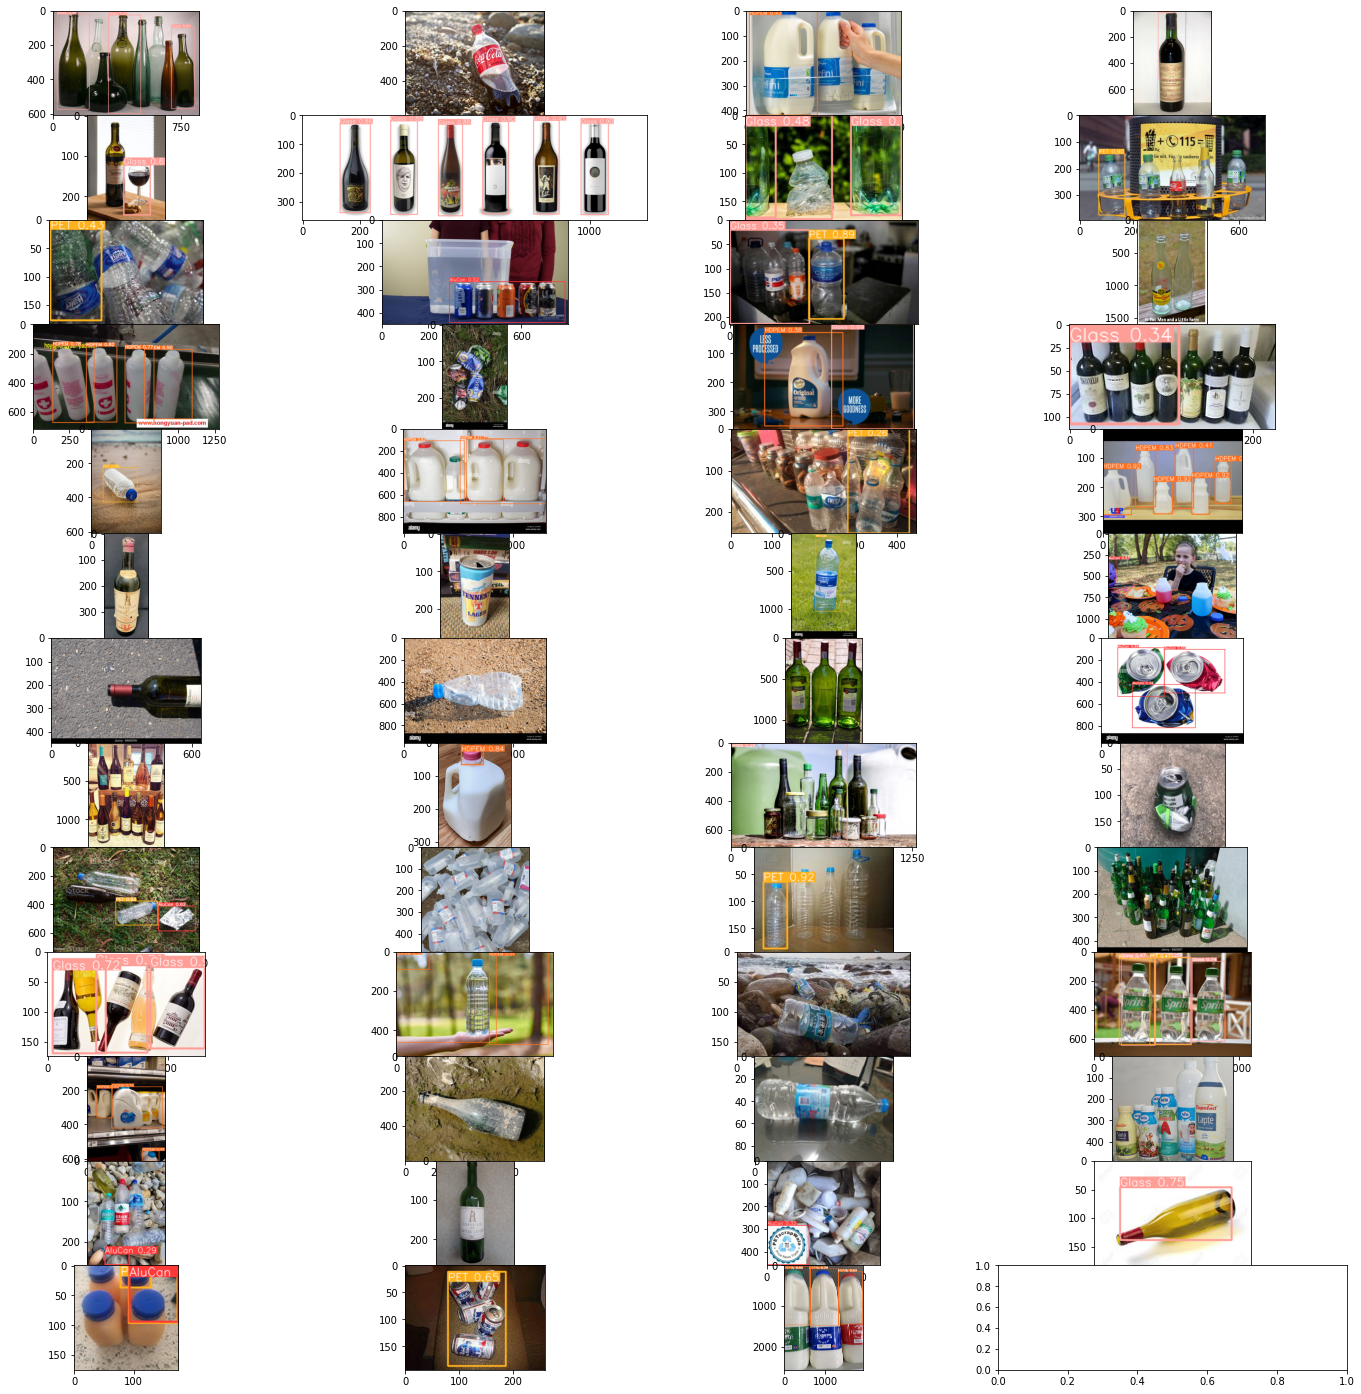

In [42]:
random.shuffle(images)

plt.figure(figsize=(25,25))

fig, axs = plt.subplots(13, 4,figsize=(25,25))
fig.subplots_adjust(wspace=0, hspace=0)
im_count=0
for i in range(13):
    
    axs[i, 0].imshow(model_detect(images[im_count]))
    #axs[i, 0].set_title('Axis [' +str(i)+ ', 0]')

    axs[i, 1].imshow(model_detect(images[im_count+1]))
    #axs[i, 1].set_title('Axis [' +str(i)+  ', 0]')

    axs[i, 2].imshow(model_detect(images[im_count+2]))
    #axs[i, 2].set_title('Axis [' +str(i)+  ', 0]')
    
    axs[i, 3].imshow(model_detect(images[im_count+3]))

    im_count+=4
    #print(im_count)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<h2> how to improve detection

In [ ]:
pred_list= out_results.names

In [ ]:
no_detections=[]
confidence=[]
label=[]
image_info=[]

In [ ]:
for image in images:
    out_results=model(image)
    predictions=out_results.pred
    out_results.pred[0]
    for pred in range(len(out_results.pred[0])):
        con=out_results.pred[0][pred][-2]
        confidence.append(float(con))
        p=out_results.pred[0][pred][-1]
        p = int(p)
        label.append(pred_list[p])
        no_detections.append(len(out_results.pred[0]))
        image_info.append(image)
    if len(out_results.pred[0])==0:
        image_info.append(image)
        confidence.append(0)
        no_detections.append(len(out_results.pred[0]))
        label.append("None")

tensor([[3.04783e+02, 1.70783e+02, 3.65133e+02, 2.95870e+02, 9.20583e-01, 2.00000e+00],
        [1.73026e+02, 1.83450e+02, 2.38061e+02, 2.94609e+02, 9.20523e-01, 2.00000e+00],
        [1.23779e-01, 1.39262e+02, 9.74417e+01, 2.97615e+02, 9.18497e-01, 2.00000e+00],
        [3.84223e+02, 1.13589e+02, 4.39774e+02, 2.58967e+02, 9.01697e-01, 2.00000e+00],
        [1.11721e+02, 7.61478e+01, 1.80871e+02, 2.70809e+02, 8.32551e-01, 2.00000e+00],
        [2.47864e+02, 6.84444e+01, 3.10788e+02, 2.75134e+02, 4.10584e-01, 2.00000e+00]])

tensor([], size=(0, 6))

tensor([[1.05814e+01, 1.15237e+02, 5.58913e+02, 6.66556e+02, 6.16190e-01, 2.00000e+00],
        [5.20680e+02, 9.74787e+01, 1.30000e+03, 6.87719e+02, 3.14252e-01, 2.00000e+00],
        [5.77409e+02, 1.01491e+02, 9.12197e+02, 6.62702e+02, 2.67351e-01, 2.00000e+00]])

tensor([], size=(0, 6))

tensor([[1.92947e+02, 5.99218e+00, 3.98223e+02, 5.24918e+02, 4.25707e-01, 1.00000e+00]])

tensor([[ 45.76610,  47.33939, 239.51413, 139.84677,   0.75168,   1.00000]])

tensor([[  2.45841,   0.84903,  92.10749, 178.48007,   0.42897,   3.00000]])

tensor([], size=(0, 6))

tensor([], size=(0, 6))

tensor([], size=(0, 6))

tensor([[0.00000e+00, 7.57745e+00, 7.99350e+02, 6.99856e+02, 2.55576e-01, 1.00000e+00]])

tensor([], size=(0, 6))

tensor([], size=(0, 6))

tensor([[ 13.61147,   1.02005, 285.03607, 420.00000,   0.43223,   2.00000]])

tensor([], size=(0, 6))

tensor([], size=(0, 6))

tensor([], size=(0, 6))

tensor([], size=(0, 6))

tensor([[1.52813e+02, 8.82176e+01, 5.74294e+02, 5.32386e+02, 6.90426e-01, 0.00000e+00],
        [5.76676e+02, 1.03464e+02, 1.12603e+03, 5.00865e+02, 5.49398e-01, 0.00000e+00],
        [2.85424e+02, 4.22706e+02, 8.57139e+02, 8.17356e+02, 3.38270e-01, 0.00000e+00]])

tensor([[6.24420e+00, 3.70090e+01, 6.44679e+02, 1.45943e+03, 6.46688e-01, 2.00000e+00],
        [1.31704e+03, 1.59456e+02, 1.91076e+03, 1.44225e+03, 5.96179e-01, 2.00000e+00],
        [6.15656e+02, 9.11144e+01, 1.32334e+03, 1.47664e+03, 2.88895e-01, 2.00000e+00]])

tensor([[8.05188e+02, 1.83647e+01, 8.94322e+02, 3.43071e+02, 9.09522e-01, 1.00000e+00],
        [9.70462e+02, 1.21494e+01, 1.06575e+03, 3.45320e+02, 9.03477e-01, 1.00000e+00],
        [6.28586e+02, 2.22471e+01, 7.18709e+02, 3.42939e+02, 9.03466e-01, 1.00000e+00],
        [3.08320e+02, 2.01173e+01, 4.01018e+02, 3.44990e+02, 8.83643e-01, 1.00000e+00],
        [4.74937e+02, 1.57397e+01, 5.58354e+02, 3.49901e+02, 8.56572e-01, 1.00000e+00],
        [1.32158e+02, 3.03328e+01, 2.37128e+02, 3.38529e+02, 8.56197e-01, 1.00000e+00]])

tensor([[ 44.90062, 231.71799, 103.00218, 258.80646,   0.28766,   0.00000]])

tensor([], size=(0, 6))

tensor([[3.41416e+02, 0.00000e+00, 6.25906e+02, 3.61388e+02, 6.87665e-01, 1.00000e+00],
        [1.09087e+02, 2.93842e+01, 3.80359e+02, 3.51708e+02, 3.79330e-01, 2.00000e+00]])

tensor([[ 74.13454, 145.83633, 172.86810, 375.26297,   0.89734,   3.00000]])

tensor([[ 70.54380,  10.03372, 136.16388,  68.81466,   0.83681,   2.00000]])

tensor([[4.37619e+02, 3.75209e+02, 7.29354e+02, 5.42755e+02, 9.25903e-01, 3.00000e+00],
        [7.34316e+02, 4.10481e+02, 9.91938e+02, 5.83087e+02, 6.20712e-01, 0.00000e+00],
        [7.35974e+02, 4.10742e+02, 9.91441e+02, 5.83701e+02, 4.54604e-01, 3.00000e+00]])

tensor([[2.31976e+00, 0.00000e+00, 1.68213e+02, 9.39566e+01, 3.55665e-01, 2.00000e+00],
        [4.75030e+02, 5.49795e+00, 7.75686e+02, 4.74258e+02, 3.11773e-01, 2.00000e+00],
        [1.72255e+00, 0.00000e+00, 5.11618e+02, 4.63533e+02, 2.82962e-01, 2.00000e+00]])

tensor([[6.75651e+02, 7.03204e+01, 9.01251e+02, 6.18261e+02, 7.36643e-01, 1.00000e+00],
        [1.87309e+02, 4.21911e+01, 4.19007e+02, 6.47704e+02, 4.70001e-01, 1.00000e+00],
        [3.84828e+02, 4.61374e+01, 6.71776e+02, 6.42496e+02, 4.69344e-01, 3.00000e+00],
        [1.73522e+02, 5.07014e+01, 4.15665e+02, 6.40508e+02, 3.83580e-01, 3.00000e+00],
        [4.23682e+02, 4.10983e+01, 6.64444e+02, 6.37196e+02, 2.50470e-01, 1.00000e+00]])

tensor([], size=(0, 6))

tensor([], size=(0, 6))

tensor([[ 17.67277,  64.00624,  61.86230, 187.40605,   0.92195,   3.00000]])

tensor([[2.90974e+02, 2.68033e+02, 7.87318e+02, 4.43148e+02, 5.16775e-01, 0.00000e+00]])

tensor([[171.01064,  26.02415, 261.04315, 161.78110,   0.92173,   1.00000],
        [  9.93828,  13.08752,  97.95960, 169.37337,   0.72338,   1.00000],
        [ 81.72737,  23.67116, 166.30925, 168.40186,   0.70430,   1.00000]])

tensor([[2.47466e+01, 2.49324e+01, 2.11857e+02, 5.77969e+02, 5.63272e-01, 1.00000e+00],
        [6.90832e+02, 1.02503e+02, 8.25819e+02, 5.74189e+02, 4.14314e-01, 1.00000e+00],
        [3.23582e+02, 2.99769e+01, 5.11558e+02, 6.02300e+02, 2.94572e-01, 1.00000e+00]])

tensor([[ 90.16637, 123.91372, 155.79170, 246.45717,   0.64590,   1.00000]])

tensor([[2.81519e+02, 1.55037e+00, 4.29611e+02, 2.52000e+02, 2.58603e-01, 3.00000e+00]])

tensor([[  0.67765,   1.45517, 119.08585, 108.29845,   0.33863,   1.00000]])

tensor([], size=(0, 6))

tensor([[3.25707e+02, 5.08890e+01, 6.41650e+02, 1.03599e+03, 5.72042e-01, 3.00000e+00]])

tensor([[3.67937e+02, 1.52067e+02, 5.77888e+02, 6.72352e+02, 8.18886e-01, 2.00000e+00],
        [1.36872e+02, 1.47489e+02, 4.20020e+02, 6.75256e+02, 7.81257e-01, 2.00000e+00],
        [6.33003e+02, 1.69493e+02, 8.32073e+02, 6.78253e+02, 7.71847e-01, 2.00000e+00],
        [7.67902e+02, 1.73407e+02, 1.09523e+03, 6.50257e+02, 5.01194e-01, 2.00000e+00]])

tensor([[0.00000e+00, 3.08765e+02, 1.05629e+02, 6.47698e+02, 5.69923e-01, 0.00000e+00]])

tensor([], size=(0, 6))

tensor([], size=(0, 6))

tensor([[164.70827,  40.20125, 236.64186, 205.75998,   0.89467,   3.00000],
        [  2.13206,  22.56258, 165.48920, 215.36690,   0.34958,   1.00000]])

tensor([[ 70.12583, 231.04602, 269.68637, 431.02002,   0.88280,   3.00000]])

tensor([[ 92.95039,   1.56573, 173.42787,  94.44383,   0.46823,   0.00000],
        [ 77.69827,   0.00000, 128.39186,  37.12340,   0.41853,   3.00000],
        [ 91.35673,   0.99463, 172.87712,  96.11456,   0.30904,   3.00000]])

tensor([[ 79.07658,  12.04044, 186.21553, 186.52806,   0.64913,   3.00000]])

tensor([[5.63207e+01, 1.88147e+02, 1.47231e+02, 3.61626e+02, 8.03906e-01, 2.00000e+00],
        [1.43360e+02, 1.79577e+02, 4.39205e+02, 4.20988e+02, 7.18572e-01, 2.00000e+00],
        [3.22498e+02, 5.53627e+02, 4.19049e+02, 6.13000e+02, 4.80001e-01, 2.00000e+00]])

tensor([[184.33305,   0.00000, 272.07602, 174.22327,   0.77912,   1.00000],
        [  0.00000,   0.00000, 151.05687, 181.99216,   0.47639,   1.00000],
        [  0.93144,   1.13285,  53.21540, 178.88225,   0.36361,   1.00000]])

tensor([[1.34150e+00, 2.86742e+02, 1.84373e+02, 4.58485e+02, 3.16480e-01, 0.00000e+00]])

In [ ]:
df_test= pd.concat([pd.Series(image_info),pd.Series(no_detections),pd.Series(label),pd.Series(confidence)],axis=1,\
                keys= ["Image_Name","No_Detections","Class_Name", "Confidence"]  )

In [ ]:
#No of NO Detections

In [ ]:
df_test.loc[df_test['No_Detections']==0]

,Image_Name,No_Detections,Class_Name,Confidence
6,/content/gdrive/MyDrive/data/test_images/googl...,0,None,0.0
10,/content/gdrive/MyDrive/data/test_images/googl...,0,None,0.0
14,/content/gdrive/MyDrive/data/test_images/googl...,0,None,0.0
15,/content/gdrive/MyDrive/data/test_images/googl...,0,None,0.0
16,/content/gdrive/MyDrive/data/test_images/googl...,0,None,0.0
18,/content/gdrive/MyDrive/data/test_images/googl...,0,None,0.0
19,/content/gdrive/MyDrive/data/test_images/googl...,0,None,0.0
21,/content/gdrive/MyDrive/data/test_images/googl...,0,None,0.0
22,/content/gdrive/MyDrive/data/test_images/googl...,0,None,0.0
23,/content/gdrive/MyDrive/data/test_images/googl...,0,None,0.0


In [ ]:
df_test.shape[0], df_test['No_Detections'].loc[df_test['No_Detections']==0].count()

(90, 17)

In [ ]:
difficult_images= df_test['Image_Name'].loc[df_test['No_Detections']==0].to_list()

In [ ]:
#THIS WILL RESIZE AND GIVE IMAGES A BORDER
def resize_image(image):
    model.config=0.25
    image_toresize = cv2.imread(image)     
    image_toresize = cv2.resize(image_toresize,(400,400))
    height, width = image_toresize.shape[:2]

    blank_image = np.zeros((600,900,3), np.uint8)
    blank_image[:,:] = (0,0,0)

    l_img = blank_image.copy()                    # (600, 900, 3)

    x_offset = y_offset = 70
    # Here, y_offset+height <= blank_image.shape[0] and x_offset+width <= blank_image.shape[1]
    l_img[y_offset:y_offset+height, x_offset:x_offset+width] = image_toresize.copy()

    results = model(l_img)
    plt.imshow(np.squeeze(results.render()))
    plt.show()
    
    detection =len(results.pred[0])
    if detection ==0:
        print("No detection , please try with better lighting or framing")
    

In [ ]:
#lower threshild of model to detect more

In [ ]:
def difficult_detections(bad_image):   
    model.conf=.25
    results_t = model(bad_image)
    detection =len(results_t.pred[0])
    print("NO DETECTION LOWERING THRESHOLD TO LEVEL1")
    
    if detection <=0:
        model.conf=.15
        results_t = model(bad_image)
        detection =len(results_t.pred[0])
        
        if detection >=1:
            plt.imshow(np.squeeze(results_t.render()))
            plt.show()           

        if detection == 0:
            model.conf=.1
            print("NO DETECTION LOWERING THRESHOLD TO LEVEL2 :", model.conf)
            results_t = model(bad_image)
            detection =len(results_t.pred[0])
            
            if detection >=1:
                plt.imshow(np.squeeze(results_t.render()))
                plt.show() 
              
            if detection == 0:              
                model.conf=.05
                print("NO DETECTION LOWERING THRESHOLD TO LEVEL2 :", model.conf)
                results_t = model(bad_image)
                detection =len(results_t.pred[0])
                
                if detection >=1 :
                    plt.imshow(np.squeeze(results_t.render()))
                    plt.show() 
                  

                if detection == 0:
                    resize_image(bad_image)
                    print("TRYING RESIZING")
           

    print(model.conf)
    model.conf=.25

/content/gdrive/MyDrive/data/test_images/google_images/s-l400.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1


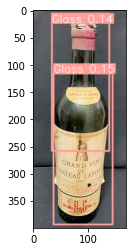

0.1
/content/gdrive/MyDrive/data/test_images/google_images/coca-cola-beach-cut.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


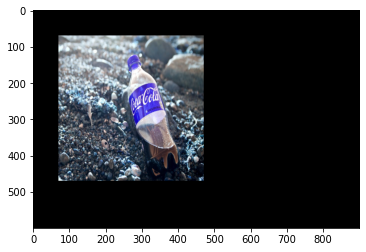

No detection , please try with better lighting or framing
TRYING RESIZING
0.05
/content/gdrive/MyDrive/data/test_images/google_images/plastic-pollution-in-sea-plastic-bottle-on-sea-shore-2AY4AEG.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


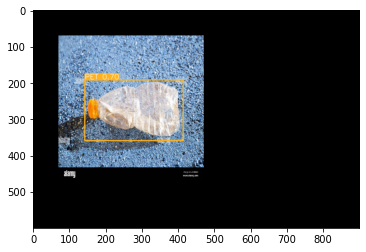

TRYING RESIZING
0.05
/content/gdrive/MyDrive/data/test_images/google_images/images (1).jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


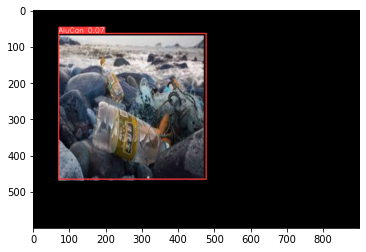

TRYING RESIZING
0.05
/content/gdrive/MyDrive/data/test_images/google_images/images8.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


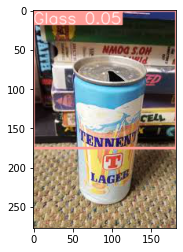

0.05
/content/gdrive/MyDrive/data/test_images/google_images/0ad538e4-c09d-46b0-a66a-6a446f2c5bf3.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1


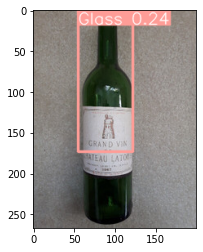

0.15
/content/gdrive/MyDrive/data/test_images/google_images/1lbottel-125x125.png
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


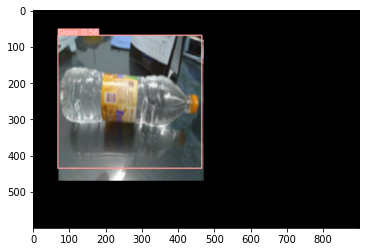

TRYING RESIZING
0.05
/content/gdrive/MyDrive/data/test_images/google_images/Aluminum_can_-_photo_taken_at_twn_by_cheryl_santa_maria.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


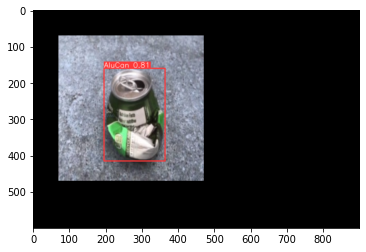

TRYING RESIZING
0.05
/content/gdrive/MyDrive/data/test_images/google_images/wine-bottles-1668836_1280.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


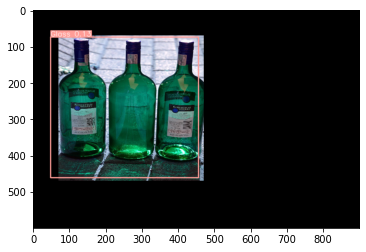

TRYING RESIZING
0.05
/content/gdrive/MyDrive/data/test_images/google_images/DSC_0304.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1


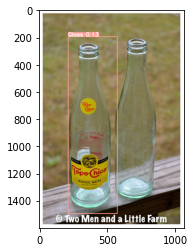

0.1
/content/gdrive/MyDrive/data/test_images/google_images/DIY-Wine-of-the-Month-Gift-Basket-Idea-The-Creative-Bite-6.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


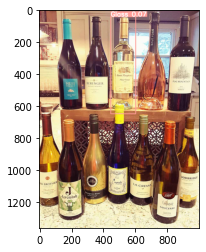

0.05
/content/gdrive/MyDrive/data/test_images/google_images/product-jpeg-500x500.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1


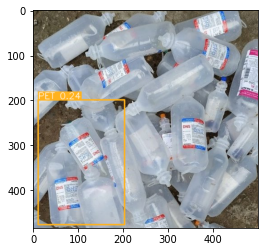

0.15
/content/gdrive/MyDrive/data/test_images/google_images/bmk09w.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


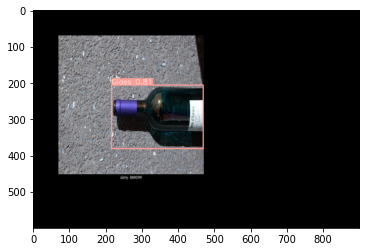

TRYING RESIZING
0.05
/content/gdrive/MyDrive/data/test_images/google_images/images10.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


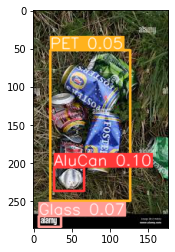

0.05
/content/gdrive/MyDrive/data/test_images/google_images/bkdbr7.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1


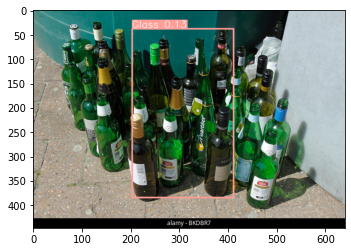

0.1
/content/gdrive/MyDrive/data/test_images/google_images/milkbottles.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1


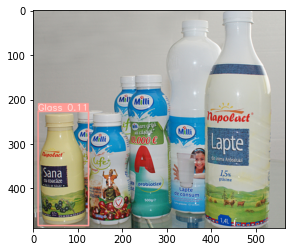

0.1
/content/gdrive/MyDrive/data/test_images/google_images/empty-bottle-trash-botte-dirty-water-69903636.jpeg
NO DETECTION LOWERING THRESHOLD TO LEVEL1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.1
NO DETECTION LOWERING THRESHOLD TO LEVEL2 : 0.05


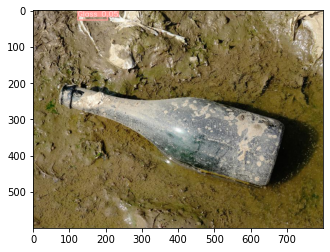

0.05


In [ ]:
for bad_image in difficult_images:
    print(bad_image)
    difficult_detections(bad_image)